In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv("C:\PyProjects\data\Stack Overflow Annual Developer Survey-2019/survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "Employment"])

df["MainBranch"] = df["MainBranch"].str.replace("I am not primarily a developer, but I write code sometimes as part of my work","I am not primarily a developer, but I \nwrite code sometimes as part of my work")
df["MainBranch"] = df["MainBranch"].str.replace('I used to be a developer by profession, but no longer am','I used to be a developer by profession, \nbut no longer am')
df["Employment"] = df["Employment"].str.replace('Independent contractor, freelancer, or self-employed','Independent contractor, freelancer, \nor self-employed')

df["MainBranch"] = df["MainBranch"].astype("category")
df["Employment"] = df["Employment"].astype("category")

df.head()

,MainBranch,Employment
Respondent,,
1,I am a student who is learning to code,"Not employed, and not looking for work"
2,I am a student who is learning to code,"Not employed, but looking for work"
3,"I am not primarily a developer, but I \nwrite ...",Employed full-time
4,I am a developer by profession,Employed full-time
5,I am a developer by profession,Employed full-time


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MainBranch  88331 non-null  category
 1   Employment  87181 non-null  category
dtypes: category(2)
memory usage: 868.4 KB


In [4]:
df_1 = df.groupby(["MainBranch","Employment"]).size().to_frame(name='count').reset_index()
df_1.head()

,MainBranch,Employment,count
0,I am a developer by profession,Employed full-time,55405
1,I am a developer by profession,Employed part-time,2350
2,I am a developer by profession,"Independent contractor, freelancer, \nor self-...",6125
3,I am a developer by profession,"Not employed, and not looking for work",210
4,I am a developer by profession,"Not employed, but looking for work",1204


In [5]:
df_1_1 = df_1.groupby("Employment")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_1["percent"] = round((100.*df_1_1["count"]/df_1_1["count"].sum()),1)
df_1_1

,Employment,count,percent
0,Employed full-time,64256,74.1
1,"Independent contractor, freelancer, \nor self-...",8436,9.7
2,"Not employed, but looking for work",5513,6.4
3,Employed part-time,4427,5.1
4,"Not employed, and not looking for work",3762,4.3
5,Retired,327,0.4


In [6]:
df_1_2 = df_1.groupby("MainBranch")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_2["percent"] = round((100.*df_1_2["count"]/df_1_2["count"].sum()),1)
df_1_2

,MainBranch,count,percent
0,I am a developer by profession,65354,75.4
1,I am a student who is learning to code,9415,10.9
2,"I am not primarily a developer, but I \nwrite ...",7466,8.6
3,I code primarily as a hobby,2936,3.4
4,"I used to be a developer by profession, \nbut ...",1550,1.8


In [7]:
df_2 = df_1.pivot_table(index="MainBranch", columns="Employment", values="count")
df_2 = df_2.reindex(df_1_1["Employment"], axis=1)  
df_2

Employment,Employed full-time,"Independent contractor, freelancer, \nor self-employed","Not employed, but looking for work",Employed part-time,"Not employed, and not looking for work",Retired
MainBranch,,,,,,
I am a developer by profession,55405,6125,1204,2350,210,60
I am a student who is learning to code,1176,935,3401,1422,2467,14
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",5931,771,251,412,68,33
I code primarily as a hobby,749,420,532,188,954,93
"I used to be a developer by profession, \nbut no longer am",995,185,125,55,63,127


In [8]:
df_2_per = round(((df_2 / df_2.sum().sum())*100),2)
df_2_1 = df_2.astype(str) + '\n' + '(' + df_2_per.astype(str) + ' %)'
df_2_1

Employment,Employed full-time,"Independent contractor, freelancer, \nor self-employed","Not employed, but looking for work",Employed part-time,"Not employed, and not looking for work",Retired
MainBranch,,,,,,
I am a developer by profession,55405\n(63.89 %),6125\n(7.06 %),1204\n(1.39 %),2350\n(2.71 %),210\n(0.24 %),60\n(0.07 %)
I am a student who is learning to code,1176\n(1.36 %),935\n(1.08 %),3401\n(3.92 %),1422\n(1.64 %),2467\n(2.84 %),14\n(0.02 %)
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",5931\n(6.84 %),771\n(0.89 %),251\n(0.29 %),412\n(0.48 %),68\n(0.08 %),33\n(0.04 %)
I code primarily as a hobby,749\n(0.86 %),420\n(0.48 %),532\n(0.61 %),188\n(0.22 %),954\n(1.1 %),93\n(0.11 %)
"I used to be a developer by profession, \nbut no longer am",995\n(1.15 %),185\n(0.21 %),125\n(0.14 %),55\n(0.06 %),63\n(0.07 %),127\n(0.15 %)


In [9]:
df_3 = df_1.pivot_table(index="Employment", columns="MainBranch", values="count")
df_3 = df_3.reindex(df_1_1["Employment"], axis=0)
df_3

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
Employment,,,,,
Employed full-time,55405,1176,5931,749,995
"Independent contractor, freelancer, \nor self-employed",6125,935,771,420,185
"Not employed, but looking for work",1204,3401,251,532,125
Employed part-time,2350,1422,412,188,55
"Not employed, and not looking for work",210,2467,68,954,63
Retired,60,14,33,93,127


In [10]:
df_3_per = round(((df_3 / df_3.sum().sum())*100),2)
df_3_1 = df_3.astype(str) + '\n' + '(' + df_3_per.astype(str) + ' %)'
df_3_1

# df_3_1 = df_3_1.transpose()
# df_3_1

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
Employment,,,,,
Employed full-time,55405\n(63.89 %),1176\n(1.36 %),5931\n(6.84 %),749\n(0.86 %),995\n(1.15 %)
"Independent contractor, freelancer, \nor self-employed",6125\n(7.06 %),935\n(1.08 %),771\n(0.89 %),420\n(0.48 %),185\n(0.21 %)
"Not employed, but looking for work",1204\n(1.39 %),3401\n(3.92 %),251\n(0.29 %),532\n(0.61 %),125\n(0.14 %)
Employed part-time,2350\n(2.71 %),1422\n(1.64 %),412\n(0.48 %),188\n(0.22 %),55\n(0.06 %)
"Not employed, and not looking for work",210\n(0.24 %),2467\n(2.84 %),68\n(0.08 %),954\n(1.1 %),63\n(0.07 %)
Retired,60\n(0.07 %),14\n(0.02 %),33\n(0.04 %),93\n(0.11 %),127\n(0.15 %)


<h1 style='color:red'>FUNCTIONS</h1>

In [11]:
######################
# ax1 (top)
######################
def total_bar_graph_annotate(df):
    for idx, acc in enumerate(list(df.columns)): 
        value=df[acc].sum()
        percent = f"({value} - {value*100/df_1['count'].sum():1.1f}%)" 
#         percent = f"({value} - {value*100/df.sum().sum():1.1f}%)" 
        ax1.annotate(percent, xy=(value+300, idx), xycoords="data",   
                        va='center', ha='left', rotation=0)
    
######################
# ax2 (bottom-left)
######################
def table_customization (table, df, index, columns, min, max):
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    cellDict = table.get_celld()

    for i in range(0,len(index)):
        for j in range(0,len(columns)):
            if i==0:
                cellDict[(i,j)].set_height(0.07)
                cellDict[(i,j)].set_width(0.10)

    for i in range(1,len(index)+1):
        cellDict[(i,-1)].set_height(0.17)
        cellDict[(i,-1)].set_width(0.30)
        cellDict[(i,-1)].set_fontsize(10)
        cellDict[(i,-1)].set_text_props(weight='bold', color='k')
        for j in range(0,len(columns)):
            cellDict[(i,j)].set_height(0.17)
            if (i%2 == 0):
                cellDict[(i,j)].set_facecolor('gainsboro')
            else:
                cellDict[(i,j)].set_facecolor('w')

        for i,[j,k] in enumerate(df.iterrows(), start=1):
            for m, l in enumerate(k):
                if (l<min):
                    cellDict[(i,m)].set_facecolor('y')
                elif l>max:
                    cellDict[(i,m)].set_facecolor('g')

######################
# ax3 (bottom-middle)
######################
def autopct(pct, allvals):
    if pct<5:
        return ""
    else:
        absolute = int(pct/100.*sum(allvals))
        return "{p:.1f}%".format(p=pct)
#         return "{p:.1f}% \n({val})".format(p=pct, val=absolute)              
                
def pie_annotate(ax, df, wedges, angleA, x1, y1):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center", ha="center")

    df_filt = df[(df["count"] != 0) & (df["percent"]<5)]
    values = [f"{i:1.1f}%" for i,j in zip(df["percent"], df["count"])]

    for i, p in enumerate(wedges):
        if i in df_filt.index:
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA={angleA},angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(values[i], xy=(x, y), xytext=(x1*np.sign(x), y1*y),
                        horizontalalignment=horizontalalignment, **kw)

<h1 style='color:red'>GRAPHS-1</h1>

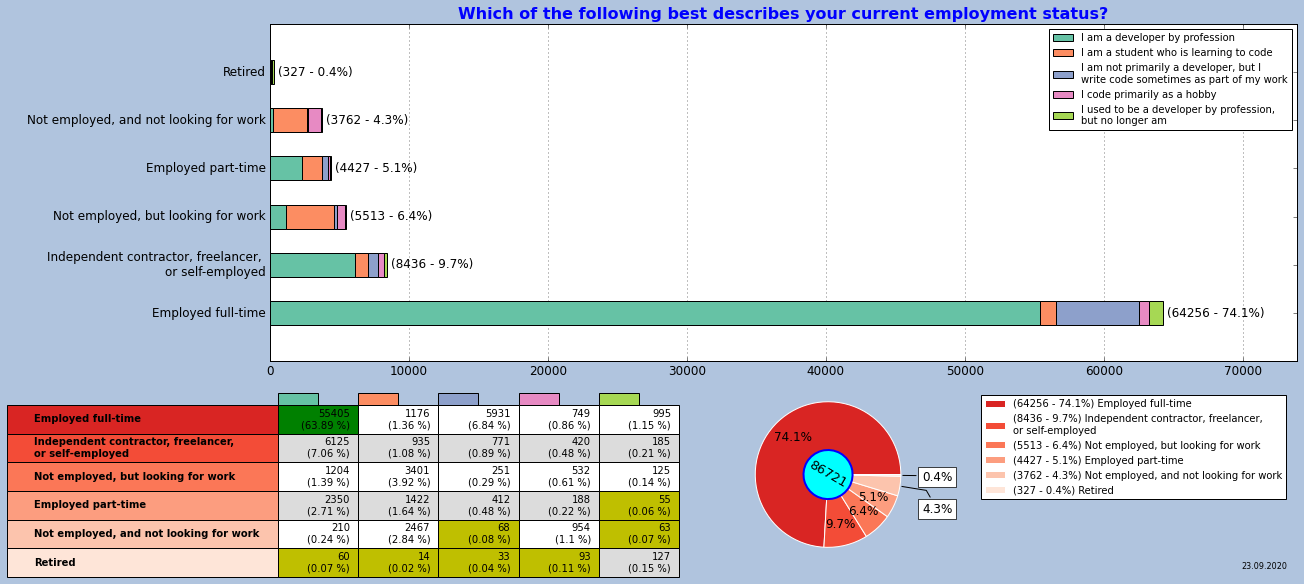

In [12]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(18,8), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.5, 1, 1.2]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_2.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_2.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_2.columns)))
cmap = plt.get_cmap("Set2")
colors_column = []
for i in range(0,len(df_3.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_2)):
    ax1.barh(index, df_2.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_2.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

total_bar_graph_annotate(df_2) #------function
######################
# ax2 (bottom-left)
######################
df_3_empty_col = [""]*(len(df_3.columns)+1)
table_1 = ax2.table(cellText=df_3_1.values, rowLabels=df_3.index, colLabels=df_3_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_1, df=df_3, index=df_3.index, columns=df_3.columns, min=100, max=10000) #------function
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_1["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_1["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_1, wedges, 120, 1.5, 3) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)  
######################
# ax4 (bottom-right)
######################
labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_1_1["Employment"], df_1_1["percent"], df_1_1["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_2.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("Which of the following best describes your current employment status?", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_2.columns)))
ax1.set_yticklabels(df_2.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_1["count"].max())*1.15])
# ax1.invert_yaxis()
ax2.axis("off")
ax3.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()

<h1 style='color:red'>GRAPHS-2</h1>

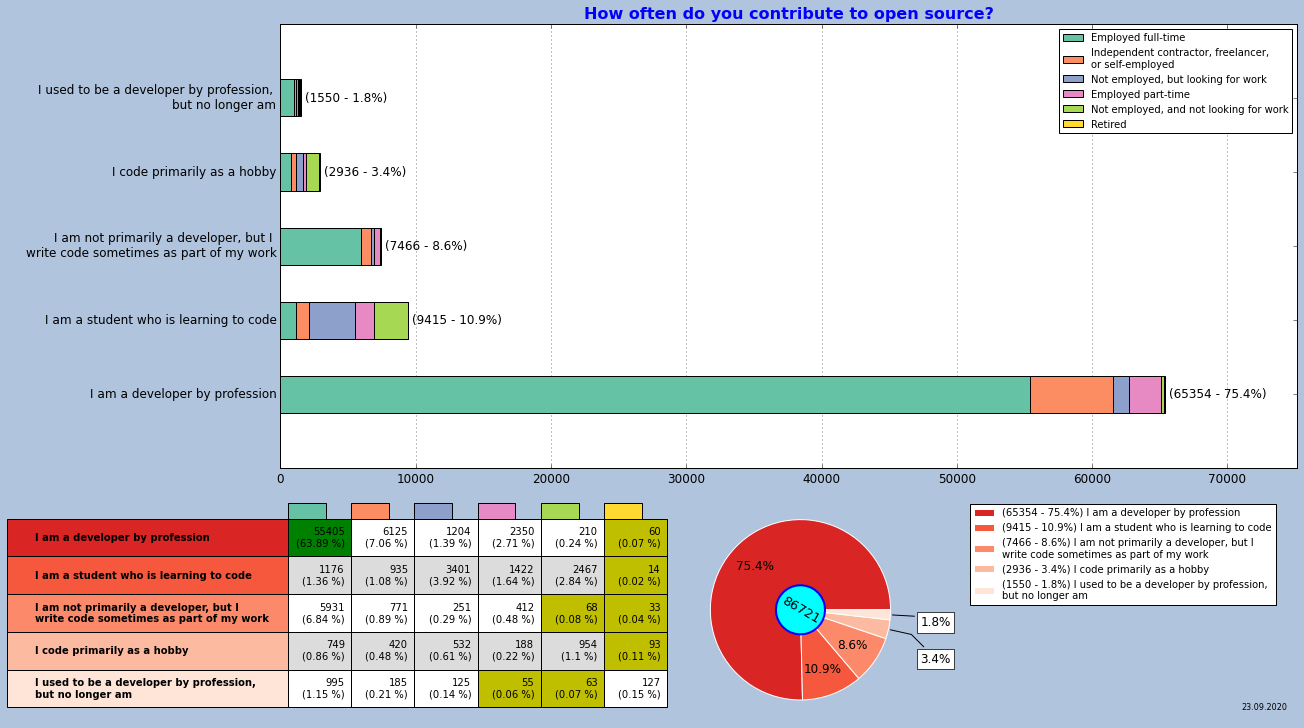

In [13]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(18,10), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.6, 1, 1.4]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_3.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_3.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_3.columns)))
cmap = plt.get_cmap("Set2")    
colors_column = []
for i in range(0,len(df_2.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_3)):
    ax1.barh(index, df_3.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_3.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

total_bar_graph_annotate(df_3)
######################
# ax2 (bottom-left)
######################
df_2_empty_col = [""]*(len(df_2.columns)+1)
table_2 = ax2.table(cellText=df_2_1.values, rowLabels=df_2.index, colLabels=df_2_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_2, df=df_2, index=df_2.index, columns=df_2.columns, min=100, max=10000)
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_2["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_2["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_2, wedges, 135, 1.5, 2.5) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)    

######################
# ax4 (bottom-right)
######################

# labels_OS_1 = [f"({i:}) {j}" for i,j in zip(df_1_2.values, df_1_2.index)]
# ax4.legend(pie[0], labels_OS_1, fontsize=10, loc="upper left")

labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_1_2["MainBranch"], df_1_2["percent"], df_1_2["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_3.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("How often do you contribute to open source?", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_3.columns)))
ax1.set_yticklabels(df_3.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_2["count"].max())*1.15])
ax2.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()